In [1]:
#importing the requied libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read and upload the dataset
df=pd.read_csv('mall-customers-data.csv')

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,customer_id,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#retrieving values from colums
x=df.iloc[:,[3,4]].values

In [8]:
x #giving annual income and spending score in the same array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
#elbow method to find optimal no. of clusters
#a fundamental step to determine k
from sklearn.cluster import KMeans
wcss=[]#within cluster sum of squares

In [10]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

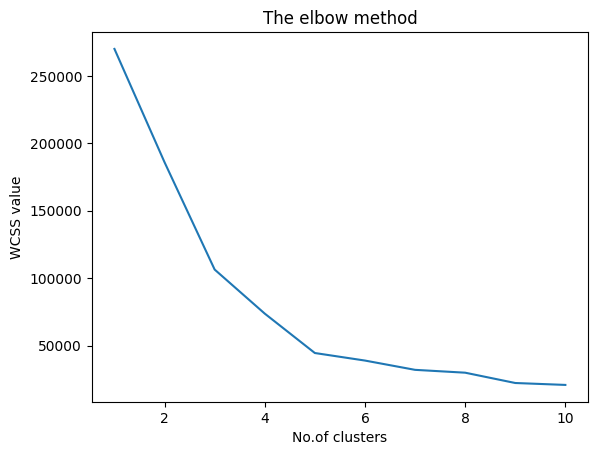

In [11]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS value')
plt.show()
#hence optimal clusters considered here are 5

In [12]:
#starting to build our model
kmeanmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [15]:
y_means=kmeanmodel.fit_predict(x)

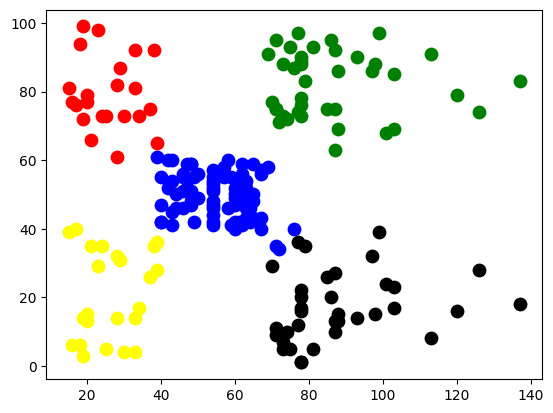

In [16]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=80,c="blue",label='Customer 1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=80,c="green",label='Customer 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=80,c="black",label='Customer 3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=80,c="yellow",label='Customer 4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=80,c="red",label='Customer 5')

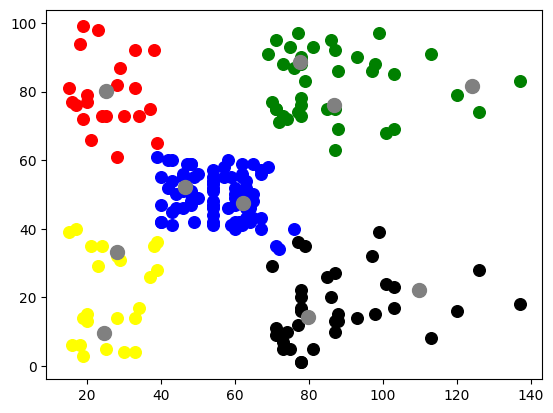

In [21]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=70,c="blue",label='Customer 1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=70,c="green",label='Customer 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=70,c="black",label='Customer 3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=70,c="yellow",label='Customer 4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=70,c="red",label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='grey',label='Centroids')

In [23]:
#dimentionality reduction and pca
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [24]:
sil_ori=silhouette_score(x,y_means)

In [25]:
sil_ori

np.float64(0.553931997444648)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_=scaler.fit_transform(x)
pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_)
kmeans_pca=KMeans(n_clusters=5,init='k-means++',random_state=0)
labels_pca=kmeans_pca.fit_predict(pca_features)
sil_pca=silhouette_score(pca_features,labels_pca)

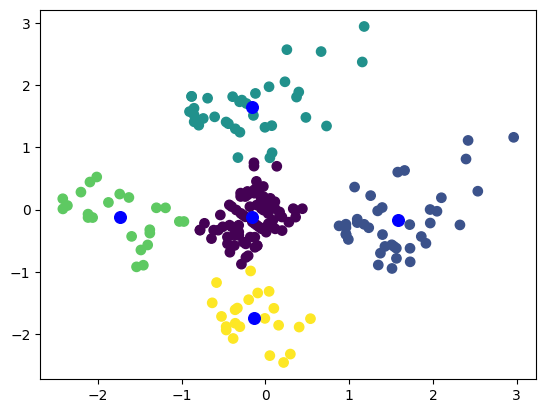

In [33]:
plt.scatter(pca_features[:,0],pca_features[:,1],c=labels_pca,cmap='viridis',s=45)
plt.scatter(kmeans_pca.cluster_centers_[:,0],kmeans_pca.cluster_centers_[:,1],s=70,c="blue",label='Centroids')

In [34]:
sil_pca

np.float64(0.5546571631100179)

In [ ]:
#pca helps in noise or unwanted data that occurs in the data and unwanted dimensions too are avoided
#using silhouette score is used to tellwhether the formed clusters are formed in a correct form or not
#it is used in accesing cluster perrformance